In [14]:
import tensorflow_datasets as tfds
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

In [15]:
dataset, metadata = tfds.load('cifar10', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [16]:
metadata.features

FeaturesDict({
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

In [17]:
len(train_dataset)

50000

In [18]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

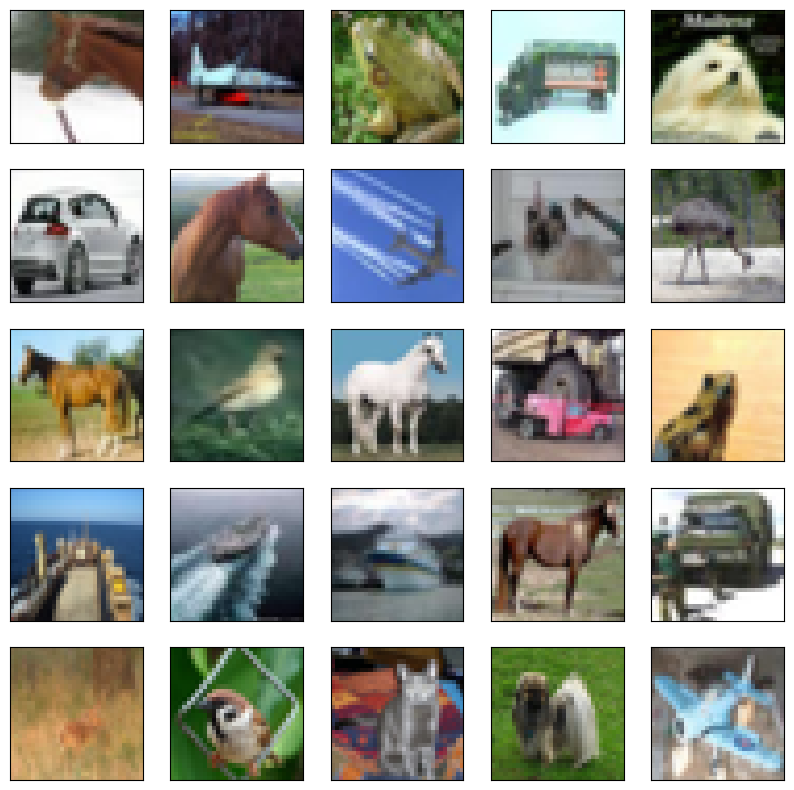

In [19]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((32,32,3))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [20]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(50000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(32, 32, 3), strides=2),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [24]:
tf.keras.utils.plot_model(
        model,
        to_file='Files/cnn_model.png',
        show_layer_names=True,
        show_shapes=True
    )

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
hist = model.fit(train_dataset, epochs=30, steps_per_epoch=math.ceil(50000/BATCH_SIZE))

Epoch 1/30
1563/1563 [==============================] - 32s 19ms/step - loss: 1.4941 - accuracy: 0.4537
Epoch 2/30
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1141 - accuracy: 0.6024
Epoch 3/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9515 - accuracy: 0.6643
Epoch 4/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8513 - accuracy: 0.7012
Epoch 5/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7537 - accuracy: 0.7369
Epoch 6/30
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6844 - accuracy: 0.7598
Epoch 7/30
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6204 - accuracy: 0.7828
Epoch 8/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5688 - accuracy: 0.8018
Epoch 9/30
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5057 - accuracy: 0.8232
Epoch 10/30
1563/1563 [==============================] - 23s 15m

In [26]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 2.2106 - accuracy: 0.6789
Accuracy on test dataset: 0.6789000034332275
